In [1]:
!pip install pandas
!pip install matplotlib
!pip install torch==2.2.1 torchvision==0.17.1 torchaudio==2.2.1 --index-url https://download.pytorch.org/whl/cu121
!pip install pillow



Looking in indexes: https://download.pytorch.org/whl/cu121


# 1. The Problem of Waiting My Luggage

Today, you’re a traveler.
After a long journey, you finally get off the plane, and then you watch a pile of luggage spinning around.
But after a long wait, your luggage still hasn’t come.
How much longer do you have to wait?

we may create some of asumptions to solve this problem?

1. The luggage must be on the airplane before it can be transferred to the baggage claim area. 

2. The conditional probability of receiving the luggage increases linearly over time. After 10 minutes, the probability becomes 1:

3. We have ignorance about the whether the lagguge is still in the airplane or not (time-independent).

$$
P(S=1)=0.5
$$

Kindly provide your thoughts and conducts on these questions.

A. After 5 minutes, what is the conditional probability that the luggage is still on the airplane? (It means I can't see the luggage in these five minutes)

B. How does the conditional probability change over time? Use a plot to show the change in probability.




## Answer
A.
T is the random variable of waiting time. By assumption,
$$P(S=1) = 0.5 $$
$$P(T<t|S=0) = \begin{cases} \frac{t}{10}, & \text {if $0\leq t \leq 10$} \\ 1, & \text{if $t>10$} \end{cases} $$
and 
$$P(T<=t|S=1) = 0  \text { $\forall$ $t$ in } [0,10] $$

By Bayes' rule, the conditional probability of waiting for $t$ minutes with luggage still on the airplane is

$$\begin{align} P(S=1|T>t) &= \frac{P(T \geq t|S=1)P(S=1)}{P(T\geq t)} \\ &= \frac{P(S=1)}{P(T\geq t|S=1)P(S=1)+P(T\geq t |S=0)P(S=0)}\\
&=\frac{10}{10(1+1-\frac{t}{10})} = \frac{10}{20-t}
\end{align}$$


$$\begin{align} P(S=1|T>5) &= \frac{P(T \geq 5|S=1)P(S=1)}{P(T\geq5)}\\ &= \frac{0.5*(1-P(T<5|S=1))}{P(T\geq5|S=1)P(S=1)+P(T\geq5|S=0)P(S=0)}\\&=\frac{0.5}{0.5+0.5*(1-0.5)}=\frac{2}{3}\end{align}$$


B.
The formula of conditional probability is 
$$\begin{align} P(S=1|T>t)&=\frac{t}{20-t} \end{align}$$

Because the function $P(S=1|T>t)$ is a probability function, the value of it should be $1$ on $[10,\infty)$. Therefore, 
$$P(S=1|T>t)=\begin{cases} \frac{t}{20-t} & \text {if $0\leq t \leq 10$} \\ 1 & \text {if $t >10$} \end{cases}$$

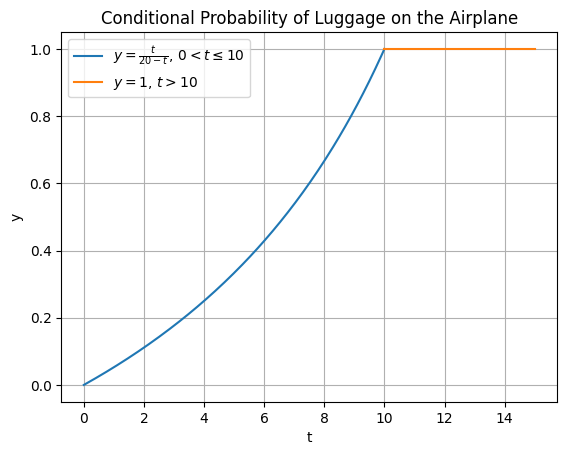

In [2]:
import numpy as np
import matplotlib.pyplot as plt


t1 = np.linspace(0.001, 10, 200)
y1 = t1 / (20 - t1)


t2 = np.linspace(10, 15, 50)
y2 = np.ones_like(t2)



plt.plot(t1, y1, label=r'$y = \frac{t}{20 - t},\, 0 < t \leq 10$')

plt.plot(t2, y2, label=r'$y = 1,\, t > 10$')

plt.xlabel('t')
plt.ylabel('y')
plt.title('Conditional Probability of Luggage on the Airplane')
plt.legend()
plt.grid(True)

plt.show()

# 2. Simpson’s Paradox in Clinical Studies: When the Treatment Effect Reverses


|            | Control Group (No Medication) |               | Treatment Group (Medication) |               |
|------------|-----------------------------|---------------|-----------------------------|---------------|
|            | Disease = 0                 | Disease = 1   | Disease = 0                 | Disease = 1   |
| Male       | 19                           | 1             | 37                           | 3             |
| Female     | 28                           | 12            | 12                           | 8             |
| Total      | 47                           | 13            | 49                           | 11            |


Today you are a doctor: you may face a problem that the treatment effect reverses.

The key observation is that, when controlling for gender, the drug has a negative effect on the disease, but when considering the total population without controlling for gender, the effect seems reversed. The doctor is confused by the existence of a drug that has harmful effects on both genders but is beneficial for everyone. 

How can we explain the result? Is that really a paradox? 

This can be explained in several ways depending on the assumptions made about the relationships between the variables.

Kindly explain the result and provide the numberical results over these folowing differnt causal asumpptions:

A. Take the gender as confounding factor on both drug and disease: gender is considered a confounder, meaning it affects both the treatment (drug) and the outcome (disease). The drug has a direct effect on the disease.

B. Take the gender as mediator (Suppose drug have super power change the gender): meaning that the drug has effects both on gender and disease, and gender then affects the disease only. 

C. Whether A and B have different results? If yes, which should we trust and explaining?



## Answer 
To simplify the following discussion, I denote all the notation as following. Let $TE$ be treatment effect, $G$ random variable (abbr as r.v.) of gender, $M,F$ Male and Female, $D$ r.v.of disease and $Tr$ r.v. of treatment, $C,T$ as control and getting treatment.

A. We assume that gender is the confounding factor, which meanes that we should control the gender factor to see the direct effect of drug on disease. In such case, the model should set gender as an exogenous parameter and compare non-disease rate to measure the treatment effect. To model it in a non-parametric way, I set gender factor as the given condition and use difference of disease conditional probability to measure treatment effect.    
$$ \begin{align}TE &= P(\text{D}=0, \text{Tr $=$ T}|\text{G $=$ M}) - P(\text{D}=0, \text{Tr $=$ C}|\text{G $=$ M})\\
&+ P(\text{D}=0, \text{Tr $=$ T}|\text{G $=$ F}) - P(\text{D}=0, \text{Tr $=$ C}|\text{G $=$ F})\\
&= \frac{37}{40} - \frac{19}{20}+\frac{12}{20} - \frac{28}{40} = -\frac{1}{8}
\end{align}$$


In such case, the drug has negative effects on the disease when we control gender. 


B. 
When we consider that gender is a mediation, gender would have Natural Indirect Effect(NIE) and Natural Direct Effect(NDE). In this case, when consider drug Treatment Effect, the computation will be as follows.
 
$$ \begin{align}TE &= NDE + NIE \\
&= \sum_{g \in \{M,F\} }[ P(\text{D}=0|\text{Tr $=$ T},\text{G $=$ g})-P(\text{D}=0|\text{Tr $=$ C},\text{G $=$ g})]P(\text{G $=$ g}|\text{Tr $=$ C})
\\ &+\sum_{g \in \{M,F\} }[P(\text{ G$=$g }|\text{Tr $=$ T})-P(\text{ G$=$g }|\text{Tr $=$ C})][P(\text{D $=$ 0} |\text{Tr $=$ C},\text{ G$=$g })]\\ &= [\frac{12}{20}-\frac{28}{40}]\frac{40}{60}+[\frac{37}{40}-\frac{19}{20}]\frac{20}{60}+[\frac{40}{60}-\frac{20}{60}]\frac{28}{40}+[\frac{20}{60}-\frac{40}{60}]\frac{19}{20}\\&=-\frac{1}{15}-\frac{1}{120}-\frac{1}{12}=-\frac{17}{120}
\end{align}$$

In such case, the drug has negative effects on the disease when we suppose drug has effects to influence gender. 

C. 
These two sets of results exhibit slight discrepancies, which raises the question of whether the gender effect might encompass other unknown influences. If further research does not establish gender as a mediator, it should be treated as a confounding factor. Under the confounder assumption, gender is simply one influence that can be controlled for, and thus there is no need to assume independence between the gender effect and the drug effect. This leaves room for other unknown factors to exert an influence on the drug’s efficacy.

Conversely, if gender is posited as a mediator, one must assume that the gender effect is independent of the drug’s direct effect. In this scenario, any other unknown factor that is indirectly influenced by the drug and subsequently affects the treatment outcome would be subsumed under the gender effect. Although this does not alter the direction of the treatment effect relative to the confounder assumption, it implies a more substantial and specific relationship between gender and the drug.



# 3. Basic Shape Classifier

## Objective:
Develop a Jupyter Notebook that demonstrates the training, testing, and validation of a simple vision machine learning model to classify images into three categories: circles, squares, and triangles.

## Tools and Libraries Required:
* Python 3.x
* PyTorch
* torchvision
* matplotlib (for visualization)
* PIL (Python Imaging Library)
* Jupyter Notebook

## Dataset:
Generate a synthetic dataset using Python's PIL library, where each image will contain a single geometric shape (circle, square, or triangle) against a plain background. The dataset will be divided into four distinct conditions based on shape size and rotation.

Conditions for Dataset Splitting:

Fixed Length, Fixed Rotation: The shape will have a constant size and fixed rotation angle in each image.
Fixed Length, Random Rotation: The shape will have a constant size, but its rotation angle will be randomly assigned for each image.
Random Length, Fixed Rotation: The shape's size will vary randomly, but it will have a fixed rotation angle for all images.
Random Length, Random Rotation: Both the shape's size and its rotation angle will vary randomly for each image.

[optional]: the background color can be random and be filled with random gassian noise (which is good to answer the robustness question)

# Task Description:

## Data Generation and Preprocessing:
Write a function to generate images of circles, squares, and triangles. Each shape should be randomly placed within the image frame.

## Ensure a balanced dataset: generate an equal number of images for each shape.
Normalize the images and split the dataset into training, validation, and testing sets.
Create DataLoader for each dataset subset with a suitable batch size.




# Generate datasets with PIL

In [ ]:
import random
import math
import numpy as np
from PIL import Image, ImageDraw
print(np.__version__)

In [ ]:
def _rotate_polygon(cx, cy, vertices, angle_degrees):
    """
    將多邊形 (vertices) 以 (cx, cy) 為中心點，
    旋轉 angle_degrees 角度（單位：度）。
    """
    angle_radians = math.radians(angle_degrees)
    cos_val = math.cos(angle_radians)
    sin_val = math.sin(angle_radians)
    
    rotated_vertices = []
    for x, y in vertices:
        # 1) 平移至原點
        temp_x = x - cx
        temp_y = y - cy
        
        # 2) 旋轉
        rotated_x = temp_x * cos_val - temp_y * sin_val
        rotated_y = temp_x * sin_val + temp_y * cos_val
        
        # 3) 平移回原先中心
        rotated_vertices.append((rotated_x + cx, rotated_y + cy))
    return rotated_vertices


def generate_circles(
    width=500,
    height=500,
    noise_std=25,
    random_size = True
):
    """
    產生含有隨機背景色 + 高斯雜訊，並在上面繪製多個『圓形』的影像。
    
    :param width:  影像寬度
    :param height: 影像高度
    :param num_shapes: 圓形數量
    :param noise_std: 高斯雜訊的標準差 (Standard Deviation)
    :return: 產生的 PIL Image 物件
    """
    # === [步驟 1] ===
    # 隨機生成三個通道 (R, G, B) 的基底顏色
    base_color = np.array([
        random.randint(0, 255),
        random.randint(0, 255),
        random.randint(0, 255)
    ], dtype=np.float32)
    

    
    # === [步驟 2] ===
    # 建立一個 NumPy 陣列 (height, width, 3) 來表示背景影像
    # 並用 base_color 將整個陣列填滿
    background = np.full((height, width, 3), base_color, dtype=np.float32)
    
    # === [步驟 3] ===
    # 在背景上加入高斯雜訊
    noise = np.random.normal(loc=0, scale=noise_std, size=(height, width, 3))
    background += noise  # 將雜訊直接加到背景上
    
    # 值可能超過 [0, 255]，因此要做裁切 (clip)
    background = np.clip(background, 0, 255).astype(np.uint8)
    
    # === [步驟 4] ===
    # 將 NumPy 陣列轉換為 PIL Image 物件
    image = Image.fromarray(background, mode='RGB')
    
    # 創建繪圖物件
    draw = ImageDraw.Draw(image)

    # 隨機圓形顏色
    color = (
        random.randint(0, 255),
        random.randint(0, 255),
        random.randint(0, 255)
    )
    # 隨機圓心與半徑
    while(True):
        cx = random.randint(0, width)
        cy = random.randint(0, height)
        
        
        if random_size:
            radius = random.randint(1, min(width, height)//5)
        else:
            radius = min(width, height)//5    
        
        
        # Bounding box
        left   = cx - radius
        top    = cy - radius
        right  = cx + radius
        bottom = cy + radius
        
        # 繪製圓形
        if (0 <= left <= width and 0 <= top <= height and 
            0 <= right <= width and 0 <= bottom <= height): 
            break
        
    draw.ellipse([left, top, right, bottom], fill=color)

    return image


def generate_squares(
    width=500,
    height=500,
    noise_std=25,
    random_size = True,
    random_rotation = True 
):
    """
    產生含有隨機背景色 + 高斯雜訊，並在上面繪製多個『正方形』的影像。
    
    :param width:  影像寬度
    :param height: 影像高度
    :param num_shapes: 正方形數量
    :param noise_std: 高斯雜訊的標準差 (Standard Deviation)
    :return: 產生的 PIL Image 物件
    """
    # 設定隨機背景色
    base_color = np.array([
        random.randint(0, 255),
        random.randint(0, 255),
        random.randint(0, 255)
    ], dtype=np.float32)
    
    background = np.full((height, width, 3), base_color, dtype=np.float32)
    
    # 增加隨機擾動項
    noise = np.random.normal(loc=0, scale=noise_std, size=(height, width, 3))
    background += noise
    background = np.clip(background, 0, 255).astype(np.uint8)
    
    # 繪製正方形
    image = Image.fromarray(background, mode='RGB')
    draw = ImageDraw.Draw(image)

    color = (
        random.randint(0, 255),
        random.randint(0, 255),
        random.randint(0, 255)
    )
    while(True):
        cx = random.randint(0, width)
        cy = random.randint(0, height)
    
    # 正方形半邊長

        if random_size:
            half_side = random.randint(1, min(width, height)//5)
        else:
            half_side = min(width, height)//5
        # 建立未旋轉前頂點 (中心在 (cx, cy))
        vertices = [
            (cx - half_side, cy - half_side),
            (cx + half_side, cy - half_side),
            (cx + half_side, cy + half_side),
            (cx - half_side, cy + half_side)
        ]
        if (0 <= vertices[0][0] <= width and 0 <= vertices[0][1] <= height and 
            0 <= vertices[1][0] <= width and 0 <= vertices[1][1] <= height and 
            0 <= vertices[2][0] <= width and 0 <= vertices[2][1] <= height and 
            0 <= vertices[3][0] <= width and 0 <= vertices[3][1] <= height):
            break
    
    # 隨機旋轉

    if random_rotation:
        angle = random.randint(0, 359)
        rotated_vertices = _rotate_polygon(cx, cy, vertices, angle)
    else:
        rotated_vertices = vertices
    # 繪製正方形
    draw.polygon(rotated_vertices, fill=color)

    return image


def generate_triangles(
    width=500,
    height=500,
    noise_std=25,
    random_size = True,
    random_rotation = True 
):
    """
    產生含有隨機背景色 + 高斯雜訊，並在上面繪製多個『三角形』的影像。
    
    :param width:  影像寬度
    :param height: 影像高度
    :param num_shapes: 三角形數量
    :param noise_std: 高斯雜訊的標準差 (Standard Deviation)
    :return: 產生的 PIL Image 物件
    """
    # === [步驟 1] ===
    base_color = np.array([
        random.randint(0, 255),
        random.randint(0, 255),
        random.randint(0, 255)
    ], dtype=np.float32)
    
    # === [步驟 2] ===
    background = np.full((height, width, 3), base_color, dtype=np.float32)
    
    # === [步驟 3] ===
    noise = np.random.normal(loc=0, scale=noise_std, size=(height, width, 3))
    background += noise
    background = np.clip(background, 0, 255).astype(np.uint8)
    
    # === [步驟 4] ===
    image = Image.fromarray(background, mode='RGB')
    draw = ImageDraw.Draw(image)

    color = (
        random.randint(0, 255),
        random.randint(0, 255),
        random.randint(0, 255)
    )


    # 定義等邊三角形的一邊長
    while(True):
        cx = random.randint(0, width)
        cy = random.randint(0, height)
        if random_size:
            side_length = random.randint(2, min(width, height)//2)

        else:
            side_length = min(width, height)//2
            # 計算三角形的高
            
        h = (math.sqrt(3) / 2) * side_length
        # 未旋轉前的三角形頂點 (使其中心在 (cx, cy))
        x1 = cx
        y1 = cy - (2/3) * h  # 三角形頂點
        x2 = cx - side_length / 2
        y2 = cy + (1/3) * h
        x3 = cx + side_length / 2
        y3 = y2
        
        vertices = [(x1, y1), (x2, y2), (x3, y3)]
        if (0 <= x1 <= width and 0 <= y1 <= height and 
            0 <= x2 <= width and 0 <= y2 <= height and 
            0 <= x3 <= width and 0 <= y3 <= height):
            break
            

    # 隨機旋轉
    if random_rotation:
        angle = random.randint(0, 359)
        rotated_vertices = _rotate_polygon(cx, cy, vertices, angle)
    else:
        rotated_vertices = vertices
    # 繪製三角形
    draw.polygon(rotated_vertices, fill=color)

    return image



In [ ]:
# 生成三角形的圖形資料庫

for i in range(1,1501):
    # 固定大小與旋轉的三角形
    img_triangles = generate_triangles(width=200, height=200, noise_std=10,random_rotation=False,random_size=False)
    img_triangles.save(f"dataset/triangle/t{i}.png")
    # 隨機大小固定旋轉的三角形
    img_triangles = generate_triangles(width=200, height=200, noise_std=10,random_rotation=False,random_size=True)
    img_triangles.save(f"dataset/triangle/trs{i}.png")
    # 固定大小隨機旋轉的三角形
    img_triangles = generate_triangles(width=200, height=200, noise_std=10,random_rotation=True,random_size=False)
    img_triangles.save(f"dataset/triangle/trr{i}.png")
    # 隨機大小隨機旋轉的三角形
    img_triangles = generate_triangles(width=200, height=200, noise_std=10,random_rotation=True,random_size=True)
    img_triangles.save(f"dataset/triangle/trrrs{i}.png")

In [ ]:
# 生成隨機圓形圖形資料庫

for i in range(1,1501):
    # 固定大小與旋轉的圓
    img_circles = generate_circles(width=200, height=200, noise_std=10, random_size= False)
    img_circles.save(f"dataset/circle/c{i}.png")
    # 隨機大小固定旋轉的圓
    img_circles = generate_circles(width=200, height=200, noise_std=10, random_size= True)
    img_circles.save(f"dataset/circle/crs{i}.png")
    # 固定大小隨機旋轉的圓
    img_circles = generate_circles(width=200, height=200, noise_std=10, random_size= False)
    img_circles.save(f"dataset/circle/crr{i}.png")
    # 隨機大小隨機旋轉的圓 
    img_circles = generate_circles(width=200, height=200, noise_std=10, random_size= True)
    img_circles.save(f"dataset/circle/crrrs{i}.png")

In [ ]:
# 生成正方形圖形資料庫
for i in range(1,1501):
    # 固定大小與旋轉的方形
    img_squares = generate_squares(width=200, height=200, noise_std=10,random_rotation=False,random_size=False)
    img_squares.save(f"dataset/square/s{i}.png")
    # 隨機大小固定旋轉的方形
    img_squares = generate_squares(width=200, height=200, noise_std=10,random_rotation=True,random_size=False)
    img_squares.save(f"dataset/square/srr{i}.png")
    # 固定大小隨機旋轉的方形
    img_squares = generate_squares(width=200, height=200, noise_std=10,random_rotation=False,random_size=True)
    img_squares.save(f"dataset/square/srs{i}.png")
    # 隨機大小隨機旋轉的方形
    img_squares = generate_squares(width=200, height=200, noise_std=10,random_rotation=True,random_size=True)
    img_squares.save(f"dataset/square/srrrs{i}.png")

# Model Architecture:

## Design a useful vision model that:

You can design any machine learning-based vision model such as: CNN-based model, Transfermer-based model, etc.

Kindly provide the reason why you want to choose this model?

## Training the Model:

Define the loss function (e.g., cross-entropy loss).
Select an optimizer (e.g., Adam or SGD).
Train the model for a suitable number of epochs (e.g., 10-20 epochs).
Choose the training strategy (e.g., early stopping, learning rate scheduling).
Implement checkpoints to save the model at regular intervals.
Include inline comments explaining the choice of hyperparameters.

kindly explain the reasons behind choosing these training settings.



# Data Import and Loading

{0: 'circle', 1: 'square', 2: 'triangle'}
Train set size: 12600
Validation set size: 2700
Test set size: 2700
數據集總大小: 12600
批次大小: 64
總批次數: 197

第一個批次的信息:
圖像張量形狀: torch.Size([64, 3, 200, 200])
標籤張量形狀: torch.Size([64])
標籤內容: tensor([0, 0, 1, 1, 0, 2, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 2, 0, 1, 0, 0, 1, 1, 2,
        0, 2, 1, 0, 2, 2, 1, 2, 2, 0, 1, 0, 1, 2, 1, 0, 0, 2, 2, 1, 2, 2, 0, 1,
        0, 0, 2, 0, 1, 2, 2, 0, 0, 2, 1, 1, 1, 2, 2, 2])

第一張圖片的信息:
圖片形狀: torch.Size([3, 200, 200])
對應的標籤: tensor(1)


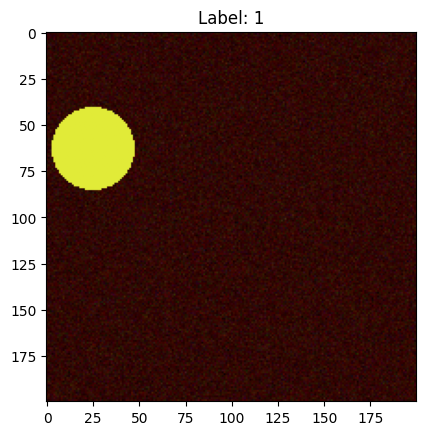

In [3]:
import torch
from torch.utils.data import Dataset, DataLoader, random_split
from torchvision import transforms
from PIL import Image
import os
import numpy as np
from torchvision.datasets import ImageFolder
from torch.utils.data import Dataset, DataLoader, random_split
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim   
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


class ImageDataset(Dataset):
    def __init__(self, data_dir, transform=None):
        self.data = ImageFolder(data_dir, transform=transform)
    
    def __len__(self):
        return len(self.data)
    
    def __getitem__(self, idx):
        return self.data[idx]
    
    @property
    def classes(self):
        return self.data.classes



# Create dataset
image_dataset = ImageDataset(
    data_dir='dataset',
    transform=transforms.Compose([transforms.ToTensor()])
)

data_dir='dataset'
target_to_class = {v: k for k, v in ImageFolder(data_dir).class_to_idx.items()}
print(target_to_class)



# Split dataset into train, val, test
dataset_size = len(image_dataset)
train_size = int(0.7 * dataset_size)
val_size = int(0.15 * dataset_size)
test_size = dataset_size - train_size - val_size

train_dataset, val_dataset, test_dataset = random_split(
    image_dataset, 
    [train_size, val_size, test_size],
    generator=torch.Generator().manual_seed(42)
)

# Create DataLoaders
train_loader = DataLoader(
    dataset=train_dataset,
    batch_size=64,
    shuffle=True
)

val_loader = DataLoader(
    dataset=val_dataset,
    batch_size=64,
    shuffle=False
)

test_loader = DataLoader(
    dataset=test_dataset,
    batch_size=64,
    shuffle=False
)

print(f"Train set size: {len(train_dataset)}")
print(f"Validation set size: {len(val_dataset)}")
print(f"Test set size: {len(test_dataset)}")

# 查看整體數據集信息
print("數據集總大小:", len(train_loader.dataset))
print("批次大小:", train_loader.batch_size)
print("總批次數:", len(train_loader))

# 查看第一個批次的數據
dataiter = iter(train_loader)
images, labels = next(dataiter)

print("\n第一個批次的信息:")
print("圖像張量形狀:", images.shape)  # 預期是 [batch_size, channels, height, width]
print("標籤張量形狀:", labels.shape)  # 預期是 [batch_size]
print("標籤內容:", labels)

# 如果想看第一張圖片的具體數值
print("\n第一張圖片的信息:")
print("圖片形狀:", images[3].shape)
print("對應的標籤:", labels[3])

# 可以使用matplotlib來視覺化第一張圖片
import matplotlib.pyplot as plt
img = images[0].permute(1, 2, 0) 
plt.imshow(img)
plt.title(f'Label: {labels[3]}')
plt.show()

# Model Construction
I chose a CNN-based model for this shape classification task primarily because the dataset comprises simple geometric forms, such as squares and triangles. I understand that convolutional neural networks excel at capturing spatial hierarchies in images, making them particularly suitable for detecting clear-cut patterns and edges. Another key advantage of CNNs is that they apply convolutions locally, allowing the model to learn essential features—like lines and corners—without requiring labor-intensive, manual feature engineering. For instance, squares and triangles can often be easily distinguished by their angles and corner arrangements, a distinguishing factor that CNNs detect through layer-by-layer feature extraction. Moreover, the pooling layers within CNNs further distill these relevant features while reducing computational complexity, making this approach highly efficient for classifying shapes.

In addition, the inherent architecture of CNNs provides a layer of interpretability in how shapes are recognized, as we can visualize feature maps to see which edges or angles the network focuses on. From a practical perspective, CNNs can deliver robust performance on relatively small datasets of simple shapes, particularly when paired with data augmentation techniques to diversify the training samples. AlexNet is one of CNN based model possessing such merits.

In [4]:


class AlexNet200(nn.Module):
    def __init__(self, num_classes=3):
        super(AlexNet200, self).__init__()
        # First convolutional layer: input 200x200x3
        self.conv1 = nn.Conv2d(3, 64, kernel_size=11, stride=4, padding=2)
        self.pool1 = nn.MaxPool2d(kernel_size=3, stride=2)
        
        self.conv2 = nn.Conv2d(64, 192, kernel_size=5, padding=2)
        self.pool2 = nn.MaxPool2d(kernel_size=3, stride=2)
        
        self.conv3 = nn.Conv2d(192, 384, kernel_size=3, padding=1)
        self.conv4 = nn.Conv2d(384, 256, kernel_size=3, padding=1)
        self.conv5 = nn.Conv2d(256, 256, kernel_size=3, padding=1)
        self.pool3 = nn.MaxPool2d(kernel_size=3, stride=2)
        # Output size: 5x5x256
        
        # Fully connected layers
        # 5x5x256 = 6400
        self.fc1 = nn.Linear(5 * 5 * 256, 4096)
        self.fc2 = nn.Linear(4096, 4096)
        self.fc3 = nn.Linear(4096, num_classes)
        
        # Dropout layer to prevent overfitting
        self.dropout = nn.Dropout(0.5)
    
    def forward(self, x):
        # Convolutional block 1
        x = F.relu(self.conv1(x))
        x = self.pool1(x)
        
        # Convolutional block 2
        x = F.relu(self.conv2(x))
        x = self.pool2(x)
        
        # Convolutional blocks 3-5
        x = F.relu(self.conv3(x))
        x = F.relu(self.conv4(x))
        x = F.relu(self.conv5(x))
        x = self.pool3(x)
        
        # Flatten tensor for fully connected layers
        x = torch.flatten(x, 1)
        
        # Fully connected layers
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = F.relu(self.fc2(x))
        x = self.dropout(x)
        x = self.fc3(x)
        
        return x

# 示例：如何创建和使用模型
def val_alexnet():
    # 创建模型实例
    model = AlexNet200(num_classes=3)  # 例如用于3个类别的分类
    
    # 创建一个示例输入
    batch_size = 10
    input_tensor = torch.randn(batch_size, 3, 200, 200)
    
    # 前向传播
    output = model(input_tensor)
    
    print(f"输入形状: {input_tensor.shape}")
    print(f"输出形状: {output.shape}")
    
    return model

# Training phase

### Hyperparameter


In [5]:
# 超參數區 (hyperparameters)

# 進行一次批次訓練所使用的資料量，使用這個數量是因為在標準的作業中，一次不能訓練太多或太少，會降低訓練效果
batch_size = 32
# 進行一次批次驗證所使用的資料量，我一次使用全部的資料，讓訓練的測試變得比較迅速
test_batch_size = 2700
# 訓練次數 = 10，因為訓練到20 結果差不多
epochs = 10               
# 模型的學習率，試過0.1，0.01結果都差不多
lr = 0.0001                 
# 模型最佳化時用以調整學習率的參數
momentum = 0.1         
# 每 10 次迭代就印出一次當前訓練狀態，以檢視效果
log_interval = 10      

# 設定 torch 進行運算的裝置，如果有 cuda 就使用 GPU 進行運算，若無則使用 CPU 進行運算
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

### Testing and Validation:

Evaluate the model on the test dataset.
Calculate and print the classification accuracy.


In [6]:
# 定義訓練過程
def train(model, device, train_loader, optimizer, epoch):
    # 開始訓練
    model.train()
    # 從 train_loader 中取出 batch 的 index, 資料, 以及資料的標籤
    for batch_idx, (image, label) in enumerate(train_loader):   
        # 指定不同變數之張量於運算的GPU或CPU裝置
        image, label = image.to(device), label.to(device)       
        # 模型初始化
        optimizer.zero_grad()                
        # 將資料傳入模型
        output = model(image)                 
        # 計算模型預測的答案與真實資料的誤差(negative log likelihood loss)
        loss = F.cross_entropy(output, label)    
        # 反向傳播
        loss.backward()                      
        # 調整模型內部參數
        optimizer.step()              
        # print 出該模型在 epoch 的訓練資料百分比以及 loss 數值
        if batch_idx % log_interval == 0:    
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(image), len(train_loader.dataset),
                100. * batch_idx / len(train_loader), loss.item()))
    return loss.item()

def val(model, device, val_loader):
    # 開始驗證
    model.eval()
    # 初始化 loss
    val_loss = 0    
    # 初始化預測正確數
    correct = 0      
    #驗證過程不進行模型內部參數調整
    with torch.no_grad():     
        # 從 test_loader 中取出資料以及資料的標籤
        for image, label in val_loader:                          
            # 指定不同變數之張量於運算的 GPU 或 CPU 裝置
            image, label = image.to(device), label.to(device)     
            # 將資料傳入模型
            output = model(image)                                  
            # 計算驗證過程的 loss 數值
            val_loss += F.cross_entropy(output, label, reduction='sum').item()  
            # 以模型預測的分數的指標位置去取得預測的答案(類別)
            pred = output.argmax(dim=1, keepdim=True)                        
            # 計算模型預測的正確率
            correct += pred.eq(label.view_as(pred)).sum().item()            

    # 平均批次驗證的 loss 數值
    val_loss /= len(test_loader.dataset)                                    

    # print 出 loss 數值及正確率
    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format( 
        val_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))
    return val_loss

### Model Optimizer Choice
We opted to use Stochastic Gradient Descent (SGD) for optimization because the function’s rate of change primarily involves linear and circular curves. As a result, the rate of change is relatively stable or “fixed,” so we do not require a complex convergence mechanism that more advanced optimizers might provide. In other words, the straightforward nature of the underlying function makes SGD sufficient for our purposes.

In [7]:
                  

# 將模型指定到 GPU 或 CPU 裝置進行運算
model = AlexNet200(num_classes=3).to(device)            

optimizer = optim.SGD(model.parameters(), lr=lr, momentum=momentum)   


train_loss = []
val_loss = []
for epoch in range(1, epochs + 1):
    train_loss.append(train(model, device, train_loader, optimizer, epoch))
    val_loss.append(val(model, device, test_loader))
# 儲存訓練好的模型
torch.save(model.state_dict(),"AlexNet200.pt") 

Train Epoch: 1 [0/12600 (0%)]	Loss: 1.100871
Train Epoch: 1 [640/12600 (5%)]	Loss: 1.097932
Train Epoch: 1 [1280/12600 (10%)]	Loss: 1.098123
Train Epoch: 1 [1920/12600 (15%)]	Loss: 1.098701
Train Epoch: 1 [2560/12600 (20%)]	Loss: 1.099059
Train Epoch: 1 [3200/12600 (25%)]	Loss: 1.097220
Train Epoch: 1 [3840/12600 (30%)]	Loss: 1.099152
Train Epoch: 1 [4480/12600 (36%)]	Loss: 1.099792
Train Epoch: 1 [5120/12600 (41%)]	Loss: 1.100416
Train Epoch: 1 [5760/12600 (46%)]	Loss: 1.100640
Train Epoch: 1 [6400/12600 (51%)]	Loss: 1.098138
Train Epoch: 1 [7040/12600 (56%)]	Loss: 1.099444
Train Epoch: 1 [7680/12600 (61%)]	Loss: 1.097936
Train Epoch: 1 [8320/12600 (66%)]	Loss: 1.098281
Train Epoch: 1 [8960/12600 (71%)]	Loss: 1.098878
Train Epoch: 1 [9600/12600 (76%)]	Loss: 1.097886
Train Epoch: 1 [10240/12600 (81%)]	Loss: 1.097741
Train Epoch: 1 [10880/12600 (86%)]	Loss: 1.099476
Train Epoch: 1 [11520/12600 (91%)]	Loss: 1.097217
Train Epoch: 1 [12160/12600 (96%)]	Loss: 1.097023

Test set: Average los

### Display a confusion matrix.

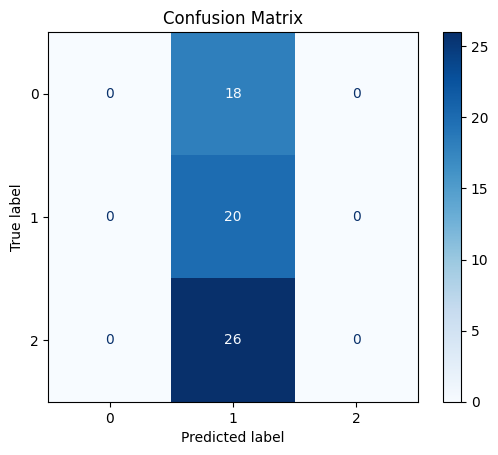

In [8]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
examples = enumerate(test_loader)    
batch_idx, (test_data, test_targets) = next(examples)
test_data = test_data.to(device)

model = AlexNet200(num_classes=3).to(device)  
# Load the saved state dictionary
model.load_state_dict(torch.load("AlexNet200.pt"))

# Set the model to evaluation mode
model.eval()

# Then use it for inference
with torch.no_grad():
    output = model(test_data)

_, predicted = torch.max(output, 1)

test_targets = test_targets.cpu() if test_targets.is_cuda else test_targets
predicted = predicted.cpu() if predicted.is_cuda else predicted

y_true = test_targets.numpy()
y_pred = predicted.numpy()

# Create confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

## Visualization:
Plot training and validation loss over epochs.
Visualize some sample predictions with actual labels vs. predicted labels.


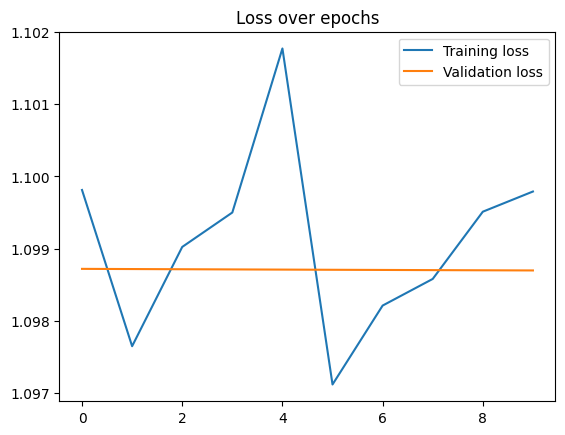

In [9]:
import matplotlib.pyplot as plt # For data viz
import pandas as pd
plt.plot(train_loss, label='Training loss')
plt.plot(val_loss, label='Validation loss')
plt.legend()
plt.title("Loss over epochs")
plt.show()

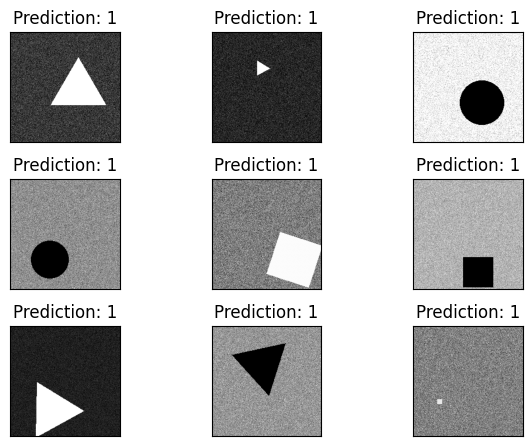

In [10]:
examples = enumerate(test_loader)    
batch_idx, (test_data, test_targets) = next(examples)
test_data = test_data.to(device)
# 將資料傳入模型 (在此屬於驗證過程)
with torch.no_grad():
    output = model(test_data)
    # 以 matplotlib 做 3 * 3 的組合圖
fig = plt.figure()
for k in range(9):
    plt.subplot(3,3,k+1)
    # 優化組合圖排列
    plt.tight_layout()    
    # 以灰階影像顯示出每一張子圖
    plt.imshow(test_data[k][0].cpu().numpy(), cmap='gray')                              
    # 將預測的答案設為每個子圖的 title
    plt.title("Prediction: {}".format(output.data.max(1, keepdim=True)[1][k].item()))   
    # 不顯示X座標軸刻度
    plt.xticks([])        
    # 不顯示Y座標軸刻度
    plt.yticks([]) 

The main problem of this is that the accuracy rate is not increasing when training goes. I make four step to check 
First, check my data and labels to ensure that the images and labels being loaded are correctly matched and that the class distribution is reasonably balanced.

Next, verify the loss function, model output dimensions, and label dimensions:

1. Make sure using CrossEntropyLoss.
Confirm that the model’s output layer has the correct number of dimensions (matching the number of classes).
2. Ensure that the labels are in the correct range (e.g., 0 to num_classes-1).

3. Also, double-check that my train(...) function is truly performing the forward → backward → optimizer.step() sequence. Missing any of these steps will prevent the weights from updating.

4. Finally, observe the train_loss, val_loss, and accuracy across multiple epochs.
Look for any upward or downward trends.

However, even after checking all of these points, I still haven’t solved the problem, and the training accuracy remains stuck at 1/3.

## Explanation:

Free to tell us, how can we learn from these dataset and examples.
How can we imporved the accuracy of the model?


